In [33]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
#import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#import pandas as pd
import math
from math import sqrt
import ROOT
import ctypes
try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style") 
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np
from main.draw_tools.decorations import b2helix, watermark
from main.draw_tools.stacking_with_error_bars import MC_stack_plot, MC_stack_plot_density

from main.data_tools.error_bars import make_data_weight
from main.data_tools.query_dataframes import cut_dfs_7types

from main.data_tools.Acp_calculator import Acp_and_AcpError_cal, Acp_cal


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
f = ROOT.TFile.Open("/media/jykim/T7/saved_plots/storage_plots/plots/MC15ri/etapip/gg/generic/fitresult/MC15ri_1ab_etapip_gg_fit_tight_v2.root")
f = ROOT.TFile.Open("/media/jykim/T7/saved_plots/storage_plots/plots/MC15ri/etapip/gg/generic/fitresult/MC15ri_1ab_etapip_gg_fit_tight_v2_fitv6.root")
# f = ROOT.TFile.Open("/media/jykim/T7/saved_plots/storage_plots/plots/MC15ri/etapip/gg/generic/fitresult/MC15ri_1ab_etapip_gg_fit_tight_v2_fitv8.root")
# f = ROOT.TFile.Open("/media/jykim/T7/saved_plots/storage_plots/plots/MC15ri/etapip/gg/generic/fitresult/MC15ri_1ab_etapip_gg_fit_tight_v2_fitv9.root")

# f = ROOT.TFile.Open("/media/jykim/T7/saved_plots/storage_plots/plots/MC15ri/etapip/gg/generic/fitresult/MC15ri_1ab_etapip_gg_fit_tight_v2_fitv3.root")

result_object1 = ROOT.gDirectory.Get("jykim")
f.Close()

fit_args1 = result_object1.floatParsFinal()

In [3]:
# Create an empty dictionary
param_dict = {}

# Iterate over the floating parameters
for i in range(fit_args1.getSize()):
    # Get parameter name
    param_name = fit_args1.at(i).GetName()
    
    # Get parameter value
    param_value = fit_args1.at(i).getVal()
    
    # Get parameter error
    param_error = fit_args1.at(i).getError()
    
    # Add the parameter name, value, and error to the dictionary
    param_dict[param_name] = {'value': param_value, 'error': param_error}

# Print the dictionary
print(param_dict)


{'Ds_mean_gaussian': {'value': -0.02480145480417595, 'error': 7.118866054480148e-05}, 'Ds_sigma_gaussian': {'value': 0.00972379997772096, 'error': 8.013012376110043e-05}, 'mean_gaussian': {'value': -0.012838556238303545, 'error': 0.0001530228738057342}, 'nDs': {'value': 123855.84391070482, 'error': 749.6161708649412}, 'nbkg1': {'value': 965656.2491368889, 'error': 2966.788432014497}, 'nbkg2': {'value': 46490.78207139758, 'error': 2038.0192099318772}, 'nsig': {'value': 48184.70552475348, 'error': 787.6833629236986}, 'rhopeta_mean': {'value': 1.7345020850324213, 'error': 0.0029129107421636507}, 'rhopeta_sigma': {'value': 0.04808996318747624, 'error': 0.0014273106868080275}, 'sigma_gaussian': {'value': 0.007743617418311538, 'error': 0.00021935939884104144}, 'x_bkg1_tau': {'value': -1.4605687423761502, 'error': 0.03105866928489618}}


In [4]:
result_object1.Print("v")


  RooFitResult: minimized FCN value: -1.68745e+07, estimated distance to minimum: 0.0281106
                covariance matrix quality: Full, accurate covariance matrix
                Status : MINIMIZE=-1 HESSE=4 HESSE=4 

    Constant Parameter    Value     
  --------------------  ------------
              Ds_delta    4.0421e-01
              Ds_gamma    3.4049e-01
       Ds_mean_johnson    1.9933e+00
      Ds_sigma_johnson    1.1644e-03
                 delta    8.9054e-01
                 gamma    3.3994e-01
          mean_johnson    1.8837e+00
         sigma_johnson    6.0692e-03

    Floating Parameter  InitialValue    FinalValue +/-  Error     GblCorr.
  --------------------  ------------  --------------------------  --------
      Ds_mean_gaussian    0.0000e+00   -2.4801e-02 +/-  7.12e-05  <none>
     Ds_sigma_gaussian    1.0000e-02    9.7238e-03 +/-  8.01e-05  <none>
         mean_gaussian    0.0000e+00   -1.2839e-02 +/-  1.53e-04  <none>
                   nDs    9.4738e+05

In [5]:
# f = ROOT.TFile.Open("/media/jykim/T7/saved_plots/storage_plots/plots/MC15ri/etapip/gg/generic/fitresult/MC15ri_1ab_etapip_gg_cc_fit_tight_v2.root")
f = ROOT.TFile.Open("/media/jykim/T7/saved_plots/storage_plots/plots/MC15ri/etapip/gg/generic/fitresult/MC15ri_1ab_etapip_gg_cc_fit_tight_v2_fitv5.root")
f = ROOT.TFile.Open("/media/jykim/T7/saved_plots/storage_plots/plots/MC15ri/etapip/gg/generic/fitresult/MC15ri_1ab_etapip_gg_cc_fit_tight_v2_fitv8.root")
f = ROOT.TFile.Open("/media/jykim/T7/saved_plots/storage_plots/plots/MC15ri/etapip/gg/generic/fitresult/MC15ri_1ab_etapip_gg_cc_fit_tight_v2_fitv9.root")
f = ROOT.TFile.Open("/media/jykim/T7/saved_plots/storage_plots/plots/MC15ri/etapip/gg/generic/fitresult/MC15ri_1ab_etapip_gg_cc_fit_tight_v2_fitv6.root")

result_object1_cc = ROOT.gDirectory.Get("jykim")
f.Close()

fit_args1_cc = result_object1_cc.floatParsFinal()

In [6]:
# Create an empty dictionary
param_dict_cc = {}

# Iterate over the floating parameters
for i in range(fit_args1_cc.getSize()):
    # Get parameter name
    param_name = fit_args1_cc.at(i).GetName()
    
    # Get parameter value
    param_value = fit_args1_cc.at(i).getVal()
    
    # Get parameter error
    param_error = fit_args1_cc.at(i).getError()
    
    # Add the parameter name, value, and error to the dictionary
    param_dict_cc[param_name] = {'value': param_value, 'error': param_error}

# Print the dictionary
print(param_dict_cc)


{'Ds_mean_gaussian': {'value': -0.02497720502083478, 'error': 7.32237929475111e-05}, 'Ds_sigma_gaussian': {'value': 0.00954500698070923, 'error': 8.221343282467254e-05}, 'mean_gaussian': {'value': -0.013133758739940715, 'error': 0.00016028391170685332}, 'nDs': {'value': 123380.97455154826, 'error': 823.0391799054795}, 'nbkg1': {'value': 986887.9491389946, 'error': 6219.037735381331}, 'nbkg2': {'value': 50976.30810542106, 'error': 5128.28899167335}, 'nsig': {'value': 47951.328531009334, 'error': 896.7260552904836}, 'rhopeta_mean': {'value': 1.7367133844791016, 'error': 0.013682621730446}, 'rhopeta_sigma': {'value': 0.04999999947102148, 'error': 5.80924006109202e-06}, 'sigma_gaussian': {'value': 0.007180949982842179, 'error': 0.00022885347925742815}, 'x_bkg1_tau': {'value': -1.4294747629496172, 'error': 0.06371121403559647}}


In [7]:
result_object1_cc.Print("v")


  RooFitResult: minimized FCN value: -1.72551e+07, estimated distance to minimum: 0.0176957
                covariance matrix quality: Full matrix, but forced positive-definite
                Status : MINIMIZE=-1 HESSE=4 HESSE=4 

    Constant Parameter    Value     
  --------------------  ------------
              Ds_delta    4.0421e-01
              Ds_gamma    3.4049e-01
       Ds_mean_johnson    1.9933e+00
      Ds_sigma_johnson    1.1644e-03
                 delta    8.9054e-01
                 gamma    3.3994e-01
          mean_johnson    1.8837e+00
         sigma_johnson    6.0692e-03

    Floating Parameter  InitialValue    FinalValue +/-  Error     GblCorr.
  --------------------  ------------  --------------------------  --------
      Ds_mean_gaussian    0.0000e+00   -2.4977e-02 +/-  7.32e-05  <none>
     Ds_sigma_gaussian    1.0000e-02    9.5450e-03 +/-  8.22e-05  <none>
         mean_gaussian    0.0000e+00   -1.3134e-02 +/-  1.60e-04  <none>
                   nDs    9

In [12]:
base_file_loc =  '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15ri_generic/MC15ri_etaetapip_tight_v2_240419_Kp_BCS_etapi0const/'
base_file_loc = '/share/storage/jykim/storage_ghi/Ntuples_ghi_2/MC15ri_generic/MC15ri_etaetapip_tight_v2_240419_Kp_BCS_etapi0const/'

#loc_ccbar = base_file_loc + 'ccbar/tight_v2_240419_Kp_BCS_etapi0const_ccbar_output_02*.root'
loc_ccbar = base_file_loc + 'ccbar/*.root'
# base_filter=' Pip_charge==1'
base_filter='etapip_gg_rank==1 && Dp_isSignal==1 && Dp_M>1.76 && Dp_M<2.1'

In [13]:
tree = 'etapip_gg'
variables = ["__experiment__", "__run__", "__event__",\
             'Dp_M','Dp_isSignal','Dp_CMS_p','Dp_cosAngleBetweenMomentumAndVertexVector','Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane',\
             'Dp_acos_cosAngleBetweenMomentumAndVertexVector','Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane',\
             'etapip_Eta_M','etapip_Eta_isSignal','etapip_Eta_daughterDiffOfPhi_0_1','etapip_Eta_daughterAngle_0_1','etapip_Eta_Easym','etapip_Eta_p',\
             'etapip_gamma1_p','etapip_gamma2_p','etapip_gamma1_clusterNHits','etapip_gamma2_clusterNHits',\
             'etapip_gamma1_clusterReg', 'etapip_gamma2_clusterReg',\
             'Pip_pionID','Pip_pionIDNN','Pip_mcPDG','Pip_dr','Pip_dr','Pip_p','Pip_charge',\
             'ROE_Mgg','dM_pi0','ROE_Mgg_50MeV','dM_pi0_50MeV','ROE_Mgg_75MeV','dM_pi0_75MeV','ROE_Mgg_mask','dM_pi0_mask',\
             'ROE_Mgg_2','dM_pi0_2','ROE_Mgg_50MeV_2','dM_pi0_50MeV_2','ROE_Mgg_75MeV_2','dM_pi0_75MeV_2','ROE_Mgg_mask_2','dM_pi0_mask_2',\
             'veto_isSignal','veto_isSignal_50MeV','veto_isSignal_75MeV','veto_isSignal_mask']

In [14]:
pd_ccbar_0 = get_pd(file=loc_ccbar, tree=tree,base_filter=base_filter,variables=variables)

In [15]:
pd_ccbar_0.describe()

# true_Dp = len(pd_ccbar_0)

,__experiment__,__run__,__event__,Dp_M,Dp_isSignal,Dp_CMS_p,Dp_cosAngleBetweenMomentumAndVertexVector,Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane,Dp_acos_cosAngleBetweenMomentumAndVertexVector,Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane,...,ROE_Mgg_50MeV_2,dM_pi0_50MeV_2,ROE_Mgg_75MeV_2,dM_pi0_75MeV_2,ROE_Mgg_mask_2,dM_pi0_mask_2,veto_isSignal,veto_isSignal_50MeV,veto_isSignal_75MeV,veto_isSignal_mask
count,92265.0,92265.0,9.226500e+04,92265.000000,92265.0,92265.000000,92265.000000,92265.000000,92265.000000,9.226500e+04,...,92265.000000,92265.000000,92265.000000,92265.000000,91687.000000,91687.000000,37109.0,57375.0,67523.0,75765.0
mean,1003.0,0.0,1.329840e+08,1.866529,1.0,3.395372,0.790279,0.999886,0.494433,7.624635e-03,...,0.270450,0.149504,0.331400,0.208805,0.345193,0.222757,0.0,0.0,0.0,0.0
std,0.0,0.0,7.686347e+07,0.015973,0.0,0.573718,0.349021,0.000430,0.513052,1.307178e-02,...,0.191618,0.180881,0.249285,0.239006,0.284594,0.274887,0.0,0.0,0.0,0.0
min,1003.0,0.0,4.320000e+02,1.760116,1.0,2.500027,-0.995366,0.995004,0.000004,2.107342e-08,...,0.030011,0.000003,0.030036,0.011001,0.030036,0.000003,0.0,0.0,0.0,0.0
25%,1003.0,0.0,6.626449e+07,1.859279,1.0,2.913909,0.757813,0.999967,0.114666,8.372114e-04,...,0.153406,0.035906,0.172966,0.052070,0.169709,0.050234,0.0,0.0,0.0,0.0
50%,1003.0,0.0,1.329447e+08,1.867686,1.0,3.333012,0.953397,0.999996,0.306494,2.771851e-03,...,0.217223,0.085439,0.262082,0.127102,0.262264,0.127284,0.0,0.0,0.0,0.0
75%,1003.0,0.0,1.995438e+08,1.875318,1.0,3.818538,0.993433,1.000000,0.710841,8.085681e-03,...,0.333454,0.198474,0.416764,0.281784,0.431818,0.296838,0.0,0.0,0.0,0.0
max,1003.0,0.0,2.657937e+08,2.073636,1.0,4.982952,1.000000,1.000000,3.045285,9.999885e-02,...,5.368346,5.233366,7.134550,6.999570,7.134550,6.999570,0.0,0.0,0.0,0.0


In [16]:
file_name = '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15ri_generic/MC15ri_etaetapip_tight_v2_240419_Kp_BCS_etapi0const/topo/resultfile/result_etapip_gg/*.root'
file_name = '/share/storage/jykim/storage_ghi//Ntuples_ghi_2/MC15ri_generic/MC15ri_etaetapip_tight_v2_240419_Kp_BCS_etapi0const/topo/resultfile/result_etapip_gg/*.root'

base_filter = '(etapip_gg_rank==1) && Dp_M>1.76 && Dp_M<2.1'
# base_filter = '(etapip_gg_rank==1)'

tree = 'etapip_gg'
variables = ["__experiment__", "__run__", "__event__",\
             'Dp_M','Dp_isSignal','Dp_CMS_p','Dp_cosAngleBetweenMomentumAndVertexVector','Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane',\
             'Dp_acos_cosAngleBetweenMomentumAndVertexVector','Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane',\
             'Pip_pionID','Pip_pionIDNN','Pip_mcPDG','Pip_dr','Pip_dr','Pip_p','Pip_charge',\
             'iProdBrP_Dsp_0','iProdBrP_Dp_0','iCascDcyBrP_Dp_0','iCascDcyBrCcP_Dp_0','iCascDcyBrP_Dsp_0','iCascDcyBrCcP_Dsp_0']
etapip_signal_topo = get_pd(file=file_name, tree=tree,base_filter=base_filter,variables=variables)

In [56]:
Nsig_Dp_MC_topo = len(etapip_signal_topo.query('Pip_charge==1 &  iCascDcyBrP_Dp_0==3'))

Nsig_Dm_MC_topo = len(etapip_signal_topo.query('Pip_charge==-1 & iCascDcyBrCcP_Dp_0==3'))

In [57]:
print(Nsig_Dp_MC_topo)

48845


In [58]:
print(Nsig_Dm_MC_topo)

48455


In [59]:
Nsig_err_Dp_MC_topo = math.sqrt(Nsig_Dp_MC_topo)
Nsig_err_Dm_MC_topo = math.sqrt(Nsig_Dm_MC_topo)

In [60]:
Acp_cal(Nsig_Dp_MC_topo,Nsig_Dm_MC_topo)

0.004008221993833504

In [61]:
Acp_and_AcpError_cal(Nsig_Dp_MC_topo,Nsig_Dm_MC_topo, Nsig_err_Dp_MC_topo,Nsig_err_Dm_MC_topo)

(0.004008221993833504, 5.0991167005776714e-05)

In [62]:
Nsig_Dp_MC_true = len(pd_ccbar_0.query('Pip_charge==1'))
Nsig_Dm_MC_true = len(pd_ccbar_0.query('Pip_charge==-1'))

In [63]:
Nsig_err_Dp_MC_true = math.sqrt(Nsig_Dp_MC_true )
Nsig_err_Dm_MC_true = math.sqrt(Nsig_Dm_MC_true )

In [64]:
Nsig_Dp_MC_true

46381

In [65]:
Nsig_Dm_MC_true

45884

In [66]:
Acp_and_AcpError_cal(Nsig_Dp_MC_true ,Nsig_Dm_MC_true, Nsig_err_Dp_MC_true, Nsig_err_Dm_MC_true )

(0.005386657995989812, 7.017895415498685e-05)

In [67]:
Nsig_Dp_recon = param_dict['nsig']['value']
Nsig_Dm_recon = param_dict_cc['nsig']['value']

Nsig_err_Dp_recon = param_dict['nsig']['error']
Nsig_err_Dm_recon = param_dict_cc['nsig']['error']


In [68]:
Acp_and_AcpError_cal(Nsig_Dp_recon , Nsig_Dm_recon , Nsig_err_Dp_recon, Nsig_err_Dm_recon)

(0.00242757043221461, 0.00012001499564082314)

In [83]:
topo_Acp, topo_AcpErr =  Acp_and_AcpError_cal(Nsig_Dp_MC_topo,Nsig_Dm_MC_topo, Nsig_err_Dp_MC_topo,Nsig_err_Dm_MC_topo)

In [84]:
true_Acp, true_AcpErr = Acp_and_AcpError_cal(Nsig_Dp_MC_true ,Nsig_Dm_MC_true, Nsig_err_Dp_MC_true, Nsig_err_Dm_MC_true )

In [85]:
recon_Acp, recon_AcpErr = Acp_and_AcpError_cal(Nsig_Dp_recon , Nsig_Dm_recon , Nsig_err_Dp_recon, Nsig_err_Dm_recon)

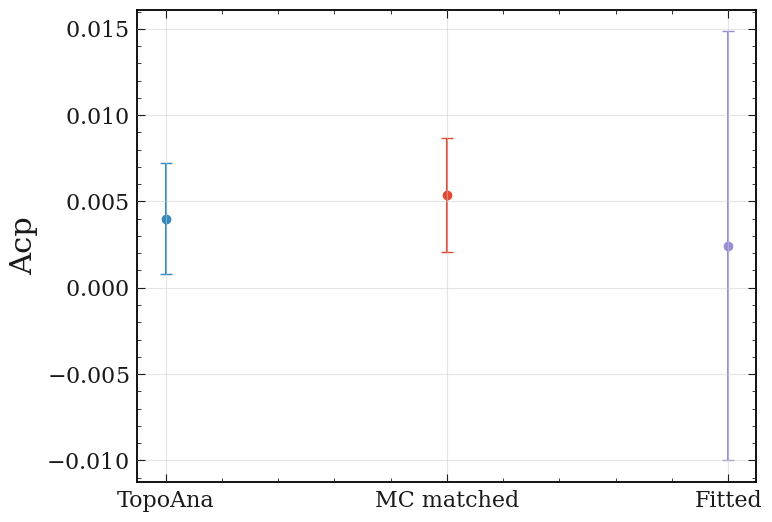

In [98]:
# Plotting
plt.errorbar(1, topo_Acp, yerr=topo_AcpErr, fmt='o',capsize=4, label='TopoAna')
plt.errorbar(2, true_Acp, yerr=true_AcpErr, fmt='o',capsize=4, label='MC matched')
plt.errorbar(3, recon_Acp, yerr=recon_AcpErr, fmt='o',capsize=4, label='Recon')

# Customizing plot
plt.xticks([1, 2, 3], ['TopoAna', 'MC matched', 'Fitted'])
# plt.xlabel('Variables')
plt.ylabel('Acp')
# plt.title('Plot with Error Bars')
# plt.legend()
plt.grid(True, alpha=0.5) 
# Display plot
# plt.ylim(0,)
plt.tight_layout()
plt.savefig("/share/storage/jykim/plots/MC15ri/etapip/gg/Acp/MC15ri_1ab_etapip_gg_compare_tight_v2_fitv6_Acp.png")
plt.show()

In [23]:
Pull_Dp = (param_dict['nsig']['value']-Nsig_Dp_MC_topo)/param_dict['nsig']['error']

In [24]:
Pull_Dm = (param_dict_cc['nsig']['value']-Nsig_Dm_MC_topo)/param_dict_cc['nsig']['error']

In [25]:
param_dict['nsig']['value']

48184.70552475348

In [26]:
param_dict_cc['nsig']['value']

47951.328531009334

In [27]:
param_dict['nsig']['error']

787.6833629236986

In [28]:
param_dict_cc['nsig']['error']

896.7260552904836

In [29]:
Pull_Dp

-0.8382739896849651

In [30]:
Pull_Dm

-0.5616781914823558

In [341]:
pd_ccbar_0.Pip_charge

0        1.0
1        1.0
2       -1.0
3       -1.0
4        1.0
        ... 
92641   -1.0
92642    1.0
92643    1.0
92644   -1.0
92645   -1.0
Name: Pip_charge, Length: 92646, dtype: float64

In [306]:
(48084.0320003556 - 46551)/46551

0.0329323108065476